<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* customer analysis
* iterator

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta
import plotnine as gg
from plotnine import ggplot, aes
import os
import re

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from collections import defaultdict
from functools import reduce

# Customer analysis

In [2]:
os.listdir()

['.config',
 '1_order_payments_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sample-sales-data.csv',
 'groceries.csv',
 'mock_sales_data.csv',
 'ecommerce-data.csv',
 'sales_data_with_stores.csv',
 'online_retail_II.xlsx',
 'sales_vs_discount.csv',
 '1_orders_dataset.csv',
 'online_retail.xlsx',
 'scanner_data.csv',
 'sales.csv',
 'test.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 '1_customers_dataset.csv',
 'mall_customers.csv',
 'sample_data']

In [4]:
df = pd.read_csv('sales_data_with_stores.csv')
df.head()

,store,product_group,product_code,stock_qty,cost,price,last_week_sales,last_month_sales
0,Violet,PG2,4187,498,420.76,569.91,13,58
1,Rose,PG2,4195,473,545.64,712.41,16,58
2,Violet,PG2,4204,968,640.42,854.91,22,88
3,Daisy,PG2,4219,241,869.69,1034.55,14,45
4,Daisy,PG2,4718,1401,12.54,26.59,50,285


In [6]:
df['rev_cost'] = df.last_week_sales * df.cost
df['rev_price'] = df.last_week_sales * df.price
df['margin'] = df.rev_price - df.rev_cost
df.head()

,store,product_group,product_code,stock_qty,cost,price,last_week_sales,last_month_sales,rev_cost,rev_price,margin
0,Violet,PG2,4187,498,420.76,569.91,13,58,5469.88,7408.83,1938.95
1,Rose,PG2,4195,473,545.64,712.41,16,58,8730.24,11398.56,2668.32
2,Violet,PG2,4204,968,640.42,854.91,22,88,14089.24,18808.02,4718.78
3,Daisy,PG2,4219,241,869.69,1034.55,14,45,12175.66,14483.70,2308.04
4,Daisy,PG2,4718,1401,12.54,26.59,50,285,627.00,1329.50,702.50


In [8]:
df_sales = df.groupby(['store'])[['rev_cost', 'rev_price']].sum().reset_index()
df_sales.head()

,store,rev_cost,rev_price
0,Daisy,910222.20,1322022.08
1,Rose,328803.92,521771.59
2,Violet,689585.28,991456.81


In [13]:
df_sales.assign(
    margin = df_sales['rev_price'] - df_sales['rev_cost'],
    margin_ratio = round(( df_sales['rev_price'] - df_sales['rev_cost'])/df_sales.rev_price*100,2)

)

,store,rev_cost,rev_price,margin,margin_ratio
0,Daisy,910222.20,1322022.08,411799.88,31.15
1,Rose,328803.92,521771.59,192967.67,36.98
2,Violet,689585.28,991456.81,301871.53,30.45


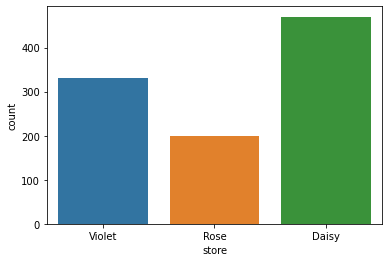

In [14]:
sns.countplot(data = df, x = 'store')

In [17]:
cnt_grp = df.groupby(['store', 'product_group'])[['rev_cost', 'rev_price']].sum().reset_index()
cnt_grp.head()

,store,product_group,rev_cost,rev_price
0,Daisy,PG1,68417.63,108562.92
1,Daisy,PG2,83087.68,139120.04
2,Daisy,PG3,101938.78,143479.16
3,Daisy,PG4,122855.63,211821.39
4,Daisy,PG5,321374.94,394793.82


In [20]:
cnt_grp = cnt_grp.assign(
    margin = cnt_grp['rev_price'] - cnt_grp['rev_cost'],
    margin_ratio = round(( cnt_grp['rev_price'] - cnt_grp['rev_cost'])/cnt_grp.rev_price*100,2)
)
cnt_grp.head()

,store,product_group,rev_cost,rev_price,margin,margin_ratio
0,Daisy,PG1,68417.63,108562.92,40145.29,36.98
1,Daisy,PG2,83087.68,139120.04,56032.36,40.28
2,Daisy,PG3,101938.78,143479.16,41540.38,28.95
3,Daisy,PG4,122855.63,211821.39,88965.76,42.00
4,Daisy,PG5,321374.94,394793.82,73418.88,18.60


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.


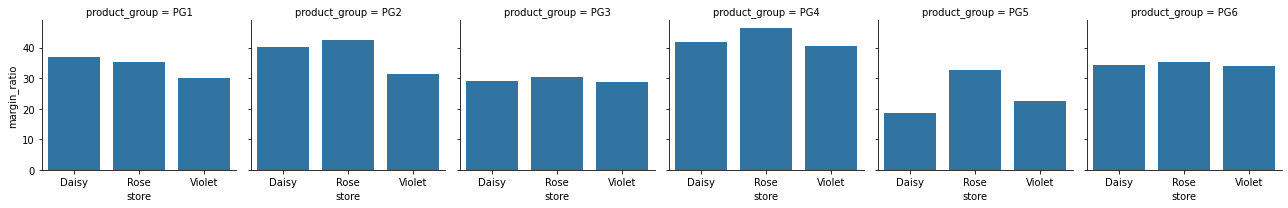

In [30]:
facet = sns.FacetGrid(data = cnt_grp, col = 'product_group')
facet = facet.map(sns.barplot, 'store', 'margin_ratio')

# Iterator

In [32]:
mat = [list('ABC'), list('DEF'), list('GHI')]
a = {letter : [r, c] for r, rows in enumerate(mat) for c, letter in enumerate(rows)}
arr = np.empty([3,3], dtype = 'object')
for k, v in a.items() :
  arr[v[0], v[1]] = k
arr

array([['A', 'B', 'C'],
       ['D', 'E', 'F'],
       ['G', 'H', 'I']], dtype=object)

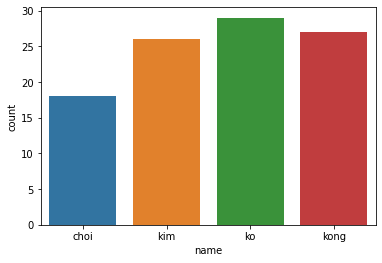

In [38]:
names = np.random.choice(['kong', 'kim', 'ko', 'choi'], 100, replace = True)

def get_score(names) :

  uniques, counts = np.unique(names, return_counts = True)
  unique = dict(zip(uniques, counts))

  res = list()

  for k, v in unique.items() :

    m = np.random.normal(50, 30, 1)
    s = np.abs(np.random.normal(10, 20, 1))
    score = [a if a <= 100 else 100 for a in np.random.normal(m, s, v)]
    temp = pd.DataFrame({'name':np.repeat(k, v),
                         'score' : score})
    res.append(temp)
  
  return pd.concat(res)

res = get_score(names)
sns.countplot(data = res, x = 'name')

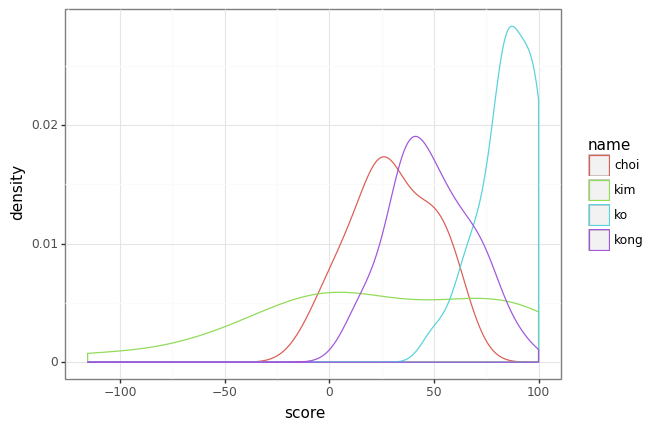

<ggplot: (8794225392453)>

In [39]:
(
    ggplot(res, aes('score', color = 'name')) +
    gg.geom_density() +
    gg.theme_bw()
)